# **Chapter 2: End-to-End Machine Learning Project**

## **1. Pendahuluan & Gambaran Besar**

Selamat datang di proyek Machine Learning pertama kita. Dalam bab ini, kita akan mensimulasikan peran sebagai seorang *Data Scientist* yang baru direkrut di sebuah perusahaan real estate.

**Tujuan Proyek:**
Tugas utama kita adalah menggunakan data sensus California untuk membangun model harga perumahan. Model ini harus mampu memprediksi harga rumah rata-rata (*median housing price*) di setiap distrik (blok geografis kecil) berdasarkan metrik lain seperti populasi, pendapatan rata-rata, dan lokasi.

**Mengapa ini penting?**
Prediksi model kita akan diteruskan ke sistem Machine Learning lain untuk membantu analisis keputusan investasi. Akurasi sangat krusial karena berdampak langsung pada pendapatan perusahaan.

**Jenis Masalah:**
1.  **Supervised Learning:** Data kita memiliki label (harga rumah yang diharapkan).
2.  **Regression (Multiple & Univariate):** Kita memprediksi nilai numerik (harga) menggunakan banyak fitur (populasi, pendapatan, dll).
3.  **Batch Learning:** Tidak ada aliran data kontinu; data cukup kecil untuk memuat di memori.

## **2. Ukuran Performa (Performance Measure)**


Dalam masalah regresi, ukuran standar untuk mengevaluasi seberapa besar kesalahan sistem adalah **Root Mean Square Error (RMSE)**. RMSE memberikan bobot lebih pada kesalahan yang besar.

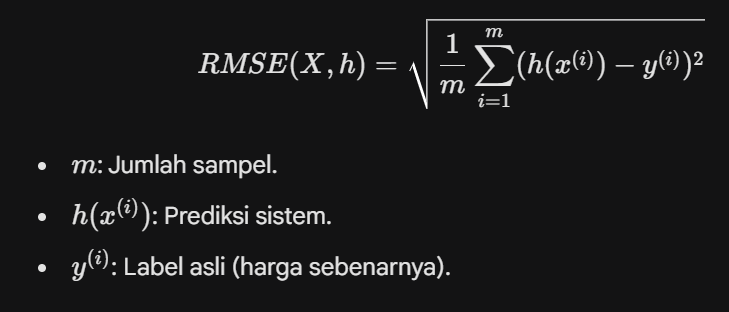

Alternatif lain adalah **Mean Absolute Error (MAE)**, namun RMSE umumnya lebih disukai untuk distribusi data normal (Gaussian).


## **3. Mengambil Data (Get the Data)**

Langkah pertama adalah menyiapkan lingkungan kerja dan memuat data.
Berikut adalah fungsi otomatis untuk mengunduh dan mengekstrak data perumahan California langsung dari repositori GitHub penulis buku.

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np

# Konfigurasi path download
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # Membuat direktori jika belum ada
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    # Download file .tgz
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # Ekstrak file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Download data (jalankan sekali saja)
fetch_housing_data()

# Load data ke DataFrame
housing = load_housing_data()
print("Data berhasil dimuat!")

Data berhasil dimuat!


C:\Users\Asus\AppData\Local\Temp\ipykernel_30416\3155408894.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


### **Eksplorasi Awal Data**

Mari kita lihat struktur data menggunakan `head()`, `info()`, dan `describe()` untuk memahami tipe data dan statistik dasarnya.

In [7]:
# Melihat 5 baris pertama
display(housing.head())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Melihat info tipe data dan nilai yang hilang
print("\\nINFO DATA:")
housing.info()

\nINFO DATA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Melihat statistik deskriptif
print("\\nSTATISTIK DESKRIPTIF:")
display(housing.describe())

\nSTATISTIK DESKRIPTIF:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Cek distribusi kategori ocean_proximity
print("\nDISTRIBUSI KATEGORI:")
print(housing["ocean_proximity"].value_counts())


DISTRIBUSI KATEGORI:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


**Visualisasi Histogram:**
Kita memvisualisasikan distribusi data numerik untuk melihat bentuk datanya (apakah normal, skewed, atau ada outlier).

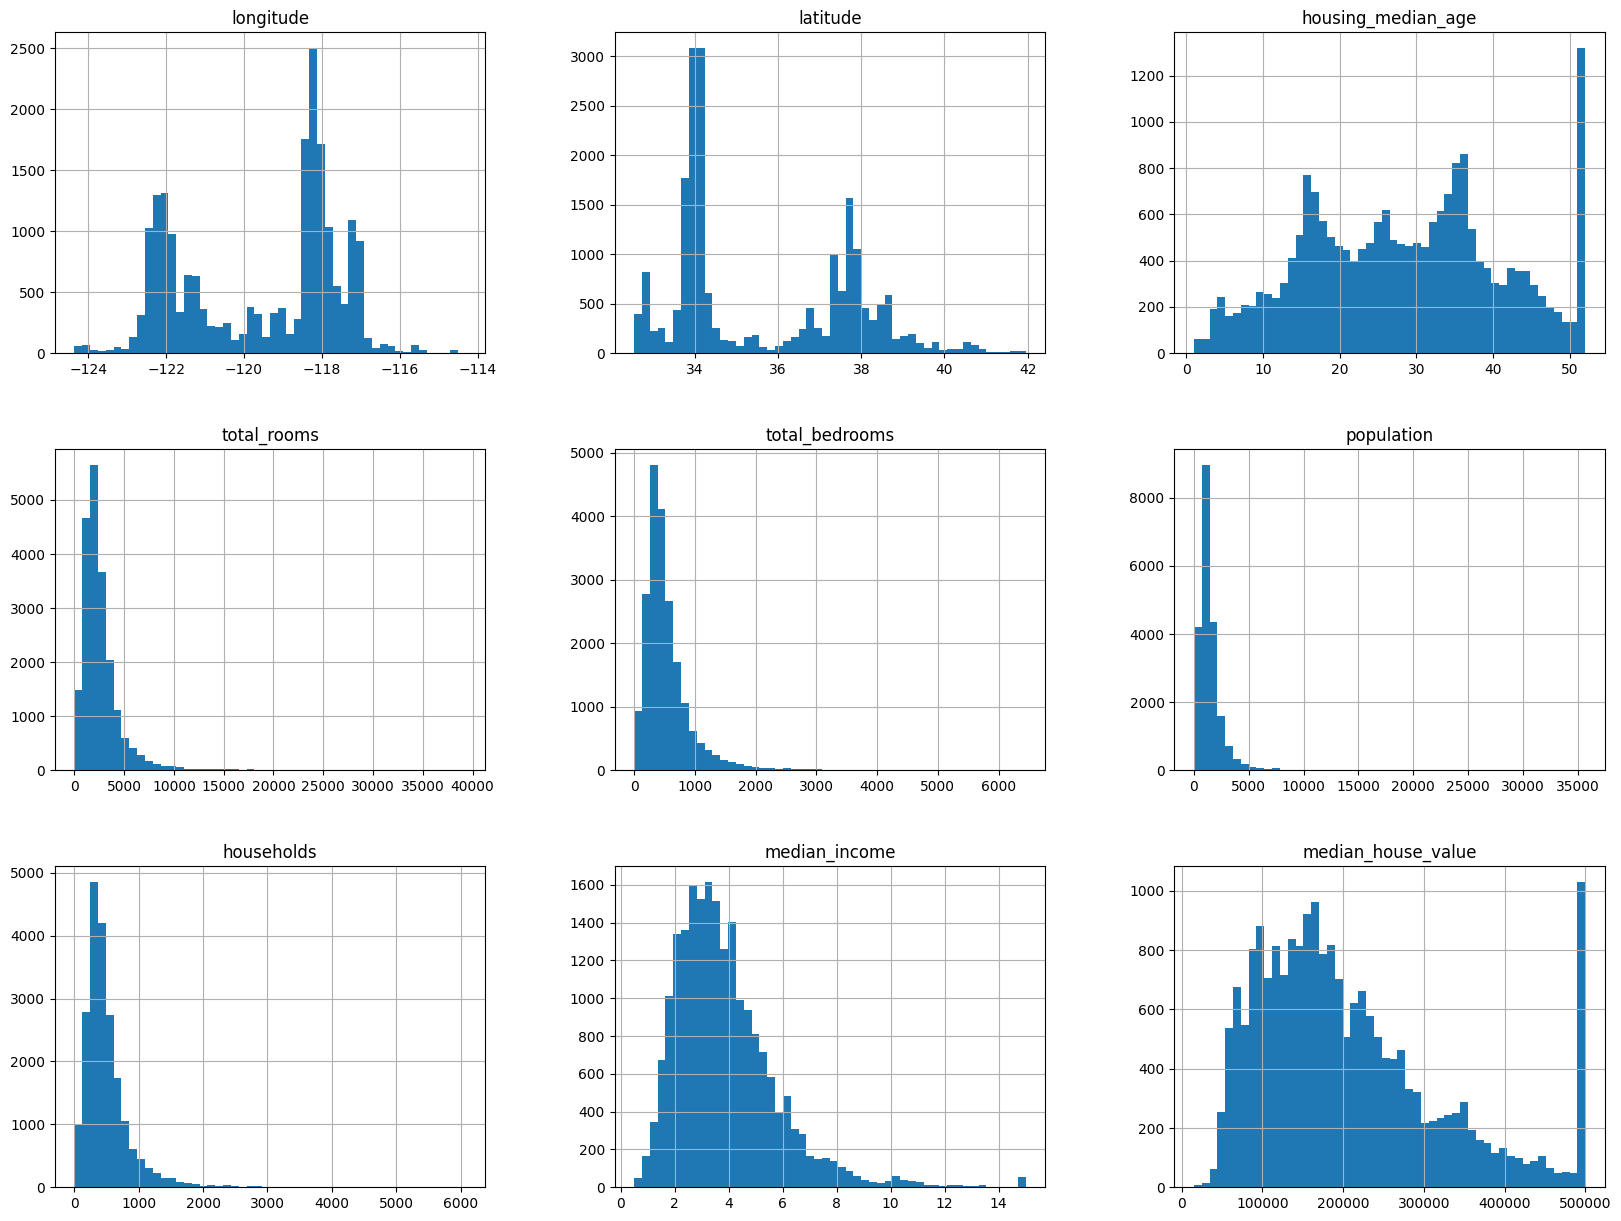

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

## **4. Membuat Test Set (Penting!)**


Sebelum melangkah lebih jauh, kita **wajib** memisahkan data uji (*test set*). Kita akan menggunakan **Stratified Sampling** berdasarkan pendapatan (`median_income`). 

Pendapatan adalah prediktor yang sangat penting, jadi kita ingin memastikan distribusi pendapatan di *test set* sama dengan distribusi populasi asli agar tidak bias.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# Membuat kategori pendapatan (income_cat) untuk keperluan stratifikasi
# Kategori 1 (0-1.5), 2 (1.5-3.0), dst.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [14]:
# Melakukan split data (80% Train, 20% Test)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Menghapus kolom income_cat setelah stratifikasi
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print(f"Jumlah Training Set: {len(strat_train_set)}")
print(f"Jumlah Test Set: {len(strat_test_set)}")

Jumlah Training Set: 16512
Jumlah Test Set: 4128


## **5. Visualisasi Data Geografis**

Karena kita memiliki data garis lintang (*latitude*) dan bujur (*longitude*), kita bisa memvisualisasikan data seperti peta. Warna (`c`) merepresentasikan harga, dan radius lingkaran (`s`) merepresentasikan populasi.

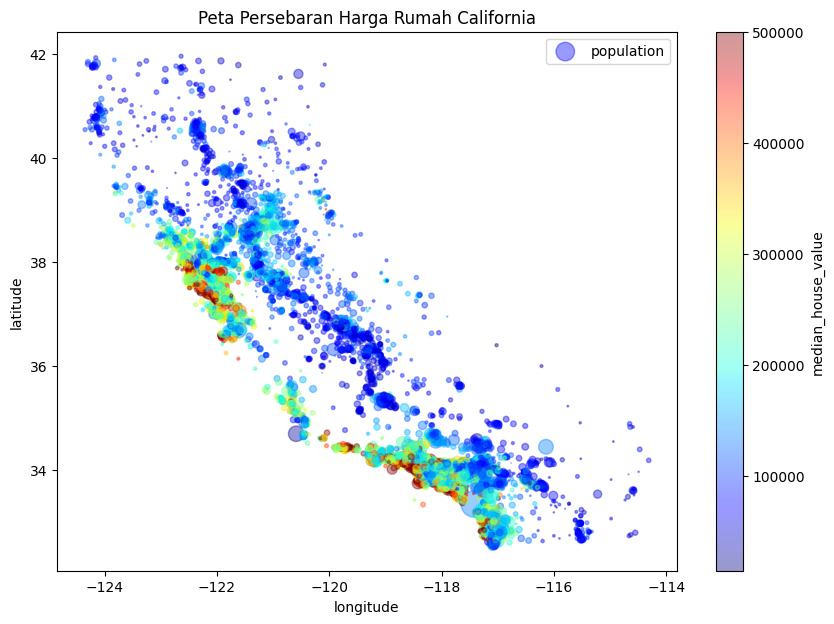

In [15]:
# Copy data training untuk eksplorasi tanpa merusak set asli
housing = strat_train_set.copy()

# Visualisasi:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.title("Peta Persebaran Harga Rumah California")
plt.show()

### **Mencari Korelasi**

Kita bisa menggunakan *Pearson’s correlation coefficient* untuk melihat hubungan linear antar atribut. Nilai mendekati 1 artinya korelasi positif kuat.

In [17]:
# Menghitung matriks korelasi
corr_matrix = housing.corr(numeric_only=True)

# Melihat korelasi fitur terhadap target (median_house_value)
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


## **6. Penyiapan Data (Data Cleaning & Preprocessing)**

Kita harus menyiapkan data secara otomatis menggunakan Pipeline.
1.  **Imputation:** Mengisi nilai hilang pada `total_bedrooms` dengan median.
2.  **Feature Engineering:** Menambah fitur `rooms_per_household`, dll.
3.  **Scaling:** Standardisasi fitur numerik.
4.  **Encoding:** Mengubah kategori teks (`ocean_proximity`) menjadi angka (One-Hot Encoding).

In [18]:
# Memisahkan fitur dan label
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Indeks kolom untuk custom transformer
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# Custom Transformer untuk menambah fitur kombinasi
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Pipeline khusus data Numerik
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Full Pipeline (Numerik + Kategorikal)
num_attribs = list(housing.select_dtypes(include=[np.number]))
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# Transformasi Data Training
housing_prepared = full_pipeline.fit_transform(housing)
print("Ukuran data setelah diproses:", housing_prepared.shape)

Ukuran data setelah diproses: (16512, 16)


## **7. Memilih dan Melatih Model**

Kita akan mencoba tiga model: Linear Regression (sederhana), Decision Tree (kompleks), dan Random Forest (ensemble).

### **Model 1: Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Evaluasi pada training set
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE:", lin_rmse)

Linear Regression RMSE: 68627.87390018745


Hasil RMSE Linear Regression menunjukkan **Underfitting**. Mari coba model yang lebih kompleks.

### **Model 2: Decision Tree Regressor**"""

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

# Evaluasi
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE:", tree_rmse)

Decision Tree RMSE: 0.0


RMSE 0.0? Ini adalah indikasi kuat **Overfitting**. Kita perlu evaluasi yang lebih valid menggunakan **Cross-Validation**.

In [27]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std Dev:", scores.std())

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Decision Tree Cross-Validation:")
display_scores(tree_rmse_scores)

Decision Tree Cross-Validation:
Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Std Dev: 2914.035468468928


### **Model 3: Random Forest Regressor**
Ensemble learning biasanya memberikan hasil lebih baik.

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

# Evaluasi Cross Validation (akan memakan waktu sedikit lama)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("Random Forest Cross-Validation:")
display_scores(forest_rmse_scores)

Random Forest Cross-Validation:
Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Std Dev: 2203.3381412764606


## **8. Fine-Tuning Model**

Random Forest memberikan hasil terbaik. Kita akan mencari *hyperparameters* optimal menggunakan **Grid Search**.

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Coba 12 kombinasi (3x4)
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Coba 6 kombinasi dengan bootstrap=False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

print("Hyperparameter Terbaik:", grid_search.best_params_)

Hyperparameter Terbaik: {'max_features': 8, 'n_estimators': 30}


### **Analisis Feature Importance**
Kita bisa melihat fitur mana yang paling berpengaruh terhadap prediksi harga.

In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3790092248170967), 'median_income'),
 (np.float64(0.16570630316895876), 'INLAND'),
 (np.float64(0.10703132208204354), 'pop_per_hhold'),
 (np.float64(0.06965425227942929), 'longitude'),
 (np.float64(0.0604213840080722), 'latitude'),
 (np.float64(0.05477891501828372), 'rooms_per_hhold'),
 (np.float64(0.048203121338269206), 'bedrooms_per_room'),
 (np.float64(0.04218822024391753), 'housing_median_age'),
 (np.float64(0.015849114744428634), 'population'),
 (np.float64(0.015554529490469328), 'total_bedrooms'),
 (np.float64(0.01524505568840977), 'total_rooms'),
 (np.float64(0.014934655161887774), 'households'),
 (np.float64(0.006792660074259966), '<1H OCEAN'),
 (np.float64(0.0030281610628962747), 'NEAR OCEAN'),
 (np.float64(0.0015247327555504937), 'NEAR BAY'),
 (np.float64(7.834806602687504e-05), 'ISLAND')]

## **9. Evaluasi Akhir pada Test Set**

Setelah model terbaik ditemukan, kita mengevaluasinya pada *test set*.
**PENTING:** Hanya panggil `transform()`, JANGAN `fit_transform()` pada data test.

In [31]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final RMSE pada Test Set:", final_rmse)

Final RMSE pada Test Set: 47873.26095812988


## **10. Kesimpulan**

Kita telah melalui siklus lengkap proyek Machine Learning:
1.  **Get Data & Split:** Mengambil data dan split (stratified).
2.  **Explore:** Menemukan korelasi geografis dan pendapatan.
3.  **Prepare:** Pipeline imputasi, encoding, scaling.
4.  **Train:** Linear Regression (Underfit) -> Decision Tree (Overfit) -> Random Forest (Best).
5.  **Fine-tune:** Grid Search.